In [1]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd

In [14]:
df = pd.read_csv(r"F:\Sales Data Analysis\bakery_sales.csv")

first few rows

In [15]:
df.head() 

,TransactionNo,Items,DateTime,Daypart,DayType
0,1,Bread,30-10-2016 09:58,Morning,Weekend
1,2,Scandinavian,30-10-2016 10:05,Morning,Weekend
2,2,Scandinavian,30-10-2016 10:05,Morning,Weekend
3,3,Hot chocolate,30-10-2016 10:07,Morning,Weekend
4,3,Jam,30-10-2016 10:07,Morning,Weekend


Info about columns


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionNo  20507 non-null  int64 
 1   Items          20507 non-null  object
 2   DateTime       20507 non-null  object
 3   Daypart        20507 non-null  object
 4   DayType        20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


Check for Missing values

In [18]:
df.isnull().sum()

TransactionNo    0
Items            0
DateTime         0
Daypart          0
DayType          0
dtype: int64

In [21]:
df['DateTime'] = pd.to_datetime(df['DateTime'],dayfirst=True)

In [22]:
df['Date'] = df['DateTime'].dt.date

In [23]:
df['Month'] = df['DateTime'].dt.month

In [25]:
df['Year'] = df['DateTime'].dt.year

In [26]:
df['Hour'] = df['DateTime'].dt.hour

In [27]:
df['DayOfWeek'] = df['DateTime'].dt.day_name()

In [28]:
df.head()

,TransactionNo,Items,DateTime,Daypart,DayType,Date,Month,Year,Hour,DayOfWeek
0,1,Bread,2016-10-30 09:58:00,Morning,Weekend,2016-10-30,10,2016,9,Sunday
1,2,Scandinavian,2016-10-30 10:05:00,Morning,Weekend,2016-10-30,10,2016,10,Sunday
2,2,Scandinavian,2016-10-30 10:05:00,Morning,Weekend,2016-10-30,10,2016,10,Sunday
3,3,Hot chocolate,2016-10-30 10:07:00,Morning,Weekend,2016-10-30,10,2016,10,Sunday
4,3,Jam,2016-10-30 10:07:00,Morning,Weekend,2016-10-30,10,2016,10,Sunday


In [40]:
top_items = df['Items'].value_counts().head(10)

In [31]:
df['DayOfWeek'].value_counts()

DayOfWeek
Saturday     3554
Friday       3266
Sunday       3118
Monday       3035
Tuesday      2645
Thursday     2601
Wednesday    2288
Name: count, dtype: int64

In [36]:
df['Daypart'].value_counts()

Daypart
Afternoon    11569
Morning       8404
Evening        520
Night           14
Name: count, dtype: int64

In [37]:
df['DayType'].value_counts()

DayType
Weekday    12807
Weekend     7700
Name: count, dtype: int64

In [38]:
import matplotlib.pyplot as plt

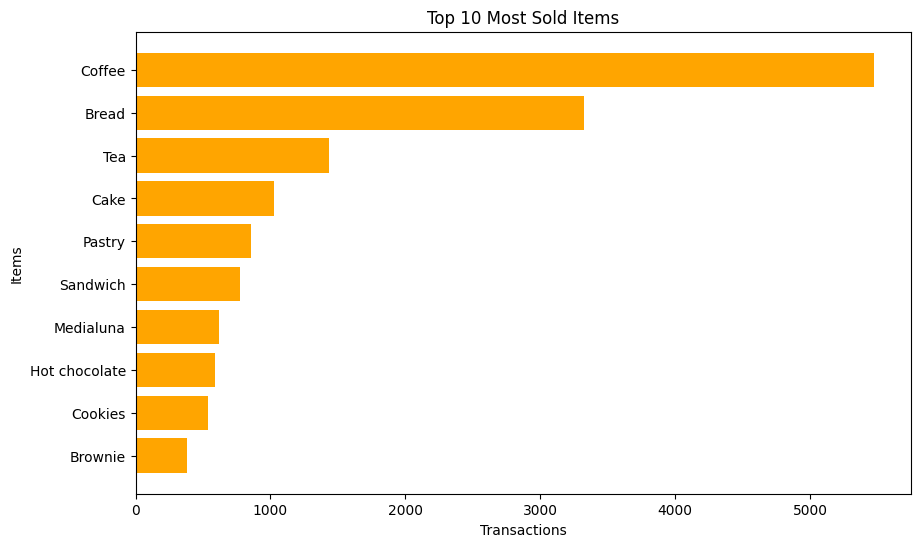

In [65]:
top_items = df['Items'].value_counts().head(10)

plt.figure(figsize=(10,6))
plt.barh(top_items.index, top_items.values, color="orange")
plt.xlabel("Transactions")
plt.ylabel("Items")
plt.title("Top 10 Most Sold Items")
plt.gca().invert_yaxis()  # so the top item is on top
plt.show()


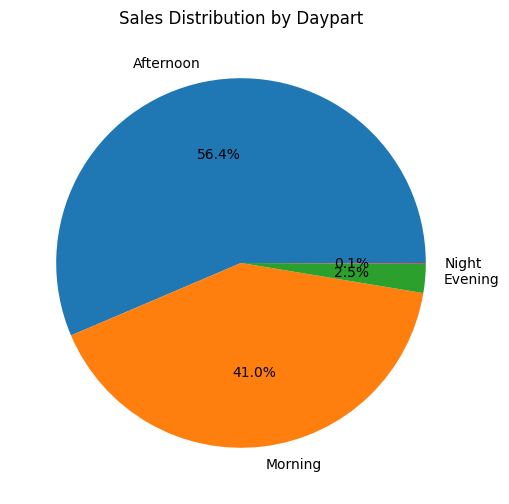

In [69]:
daypart_counts = df['Daypart'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(daypart_counts.values, labels=daypart_counts.index, autopct='%1.1f%%')
plt.title("Sales Distribution by Daypart")
plt.show()


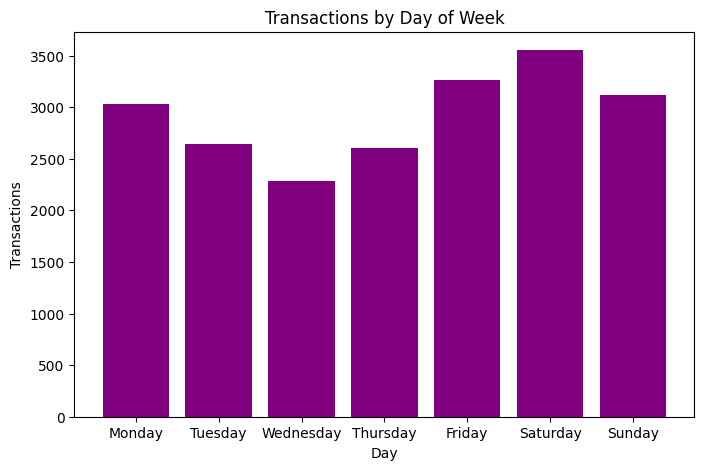

In [72]:
day_counts = df['DayOfWeek'].value_counts()
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

plt.figure(figsize=(8,5))
plt.bar(day_order, [day_counts.get(day,0) for day in day_order], color="purple")
plt.title("Transactions by Day of Week")
plt.xlabel("Day")
plt.ylabel("Transactions")
plt.show()
